# Importing and Querying Data with PostgreSQL (Northwind Database)

Describtion of the Northwind Database: https://en.wikiversity.org/wiki/Database_Examples/Northwind 

Example SQL-Queries based on the Northwind Database: https://www.w3schools.com/sql/default.asp

SQL Tutorials: https://www.youtube.com/watch?v=zpnHsWOy0RY&list=PLP9IO4UYNF0UQkBXlTMSw0CYsxv-GDkkI

## Frequently used SQL clauses (for in-depth learning)

<div>
  <style>
    .sql-keyword {
      color: white;
    }
  </style>
  <span class="sql-keyword">SELECT</span><br>
  <span class="sql-keyword">SELECT DISTINCT</span><br>
  <span class="sql-keyword">FROM</span><br>
  <span class="sql-keyword">WHERE</span><br>
  <span class="sql-keyword">AND</span><br>
  <span class="sql-keyword">LIKE</span><br>
  <span class="sql-keyword">GROUP BY</span><br>
  <span class="sql-keyword">HAVING</span><br>
  <span class="sql-keyword">ORDER BY</span><br>
  <span class="sql-keyword">FULL JOIN</span><br>
  <span class="sql-keyword">INNER JOIN</span><br>
  <span class="sql-keyword">LEFT JOIN</span><br>
  <span class="sql-keyword">RIGHT JOIN</span><br>
  <span class="sql-keyword">ON</span><br>
  <span class="sql-keyword">LIMIT</span><br>
  <span class="sql-keyword">AS</span><br>
  <span class="sql-keyword">AVG</span><br>
  <span class="sql-keyword">COUNT</span><br>
  <span class="sql-keyword">MIN</span><br>
  <span class="sql-keyword">MAX</span><br>
  <span class="sql-keyword">SUM</span><br>
  <span class="sql-keyword">BETWEEN</span><br>
  <span class="sql-keyword">IN</span><br>
  <span class="sql-keyword">IS NULL</span><br>
  <span class="sql-keyword">IS NOT NULL</span><br> 
  <span class="sql-keyword">ROUND</span><br> 
  <span class="sql-keyword">CAST</span><br>
  <span class="sql-keyword">NUMERIC</span><br>
  <span class="sql-keyword">INTEGER</span>  
</div>

## Libraries and Settings

In [207]:
# Libraries
import os
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Dark background style for all graphics 
plt.style.use('dark_background')

# Current working directory
print(os.getcwd())

/workspaces/python_postgresql_pgadmin


## Read data from .csv files to separate data frames 

In [208]:
# Define path to data

# Read data from .csv files

# Change column names to lowercase

# Check dimensions of DataFrames

## Create database connection

In [209]:
# Set up database connection
user = "pgadmin"
password = "geheim"
host = "127.0.0.1"
port = "5432"
database = "northwind"

# Create Connection URL
db_connection_url = "postgresql://" + user + ":" + password +\
                    "@" + host + ":" + port + "/" + database

2



## Write data frames to database tables

2

In [210]:
# Create SQLAlchemy Engine


# Drop tables if it exist


# Write DataFrames to database


# Dispose the engine


In [211]:
from sqlalchemy import text

# 1) Drop in richtiger Reihenfolge (wegen FK)
drop_sql = """
DROP TABLE IF EXISTS orderdetails CASCADE;
DROP TABLE IF EXISTS orders       CASCADE;
DROP TABLE IF EXISTS products     CASCADE;
DROP TABLE IF EXISTS customers    CASCADE;
DROP TABLE IF EXISTS suppliers    CASCADE;
DROP TABLE IF EXISTS categories   CASCADE;
DROP TABLE IF EXISTS shippers     CASCADE;
DROP TABLE IF EXISTS employees    CASCADE;
"""
with engine.begin() as conn:
    for stmt in drop_sql.strip().split(";"):
        s = stmt.strip()
        if s:
            conn.exec_driver_sql(s)

print("Bestehende Northwind-Tabellen gedroppt.")

# 2) Jetzt dein CREATE-Skript erneut ausführen
from pathlib import Path
sql_text = Path("SQL/CREATE_TABLES_NORTHWIND_DB.sql").read_text(encoding="utf-8")

with engine.begin() as conn:
    for stmt in sql_text.split(";"):
        s = stmt.strip()
        if s:
            conn.exec_driver_sql(s)

print("Northwind-Tabellen frisch erstellt.")

Bestehende Northwind-Tabellen gedroppt.
Northwind-Tabellen frisch erstellt.
Northwind-Tabellen frisch erstellt.


## List tables in the database

In [212]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Open a connection
with engine.connect() as connection:

    # Execute the query
    result = connection.execute(text("""SELECT table_name
                                        FROM information_schema.tables
                                        WHERE table_schema = 'public'"""))
    
    # Fetch and print the results
    for row in result:
        print(row[0])

# Dispose the engine
engine.dispose()

categories
products
suppliers
employees
orders
customers
shippers
orderdetails


In [213]:
import pandas as pd

## Create a SQL query to retrieve product information from a database.

Kontrollieren der welche Columns die Tabelle Products hat. Dient zur Recherche der versch. Columns/Spalten.

In [214]:
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'products'
""", con=engine)

df_columns

,column_name,data_type
0,productid,integer
1,supplierid,integer
2,categoryid,integer
3,price,numeric
4,productname,character varying
5,unit,character varying


Kreiieren einer Tabelle mit ausgewählten Faktoren.

In [215]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query("""
SELECT
    p.productid,
    p.productname,
    p.price,
    c.categoryname
FROM products p
JOIN categories c ON p.categoryid = c.categoryid
""",con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub


,productid,productname,price,categoryname
0,1,Chais,18.00,Beverages
1,2,Chang,19.00,Beverages
2,3,Aniseed Syrup,10.00,Condiments
3,4,Chef Anton's Cajun Seasoning,22.00,Condiments
4,5,Chef Anton's Gumbo Mix,21.35,Condiments
...,...,...,...,...
72,73,Röd Kaviar,15.00,Seafood
73,74,Longlife Tofu,10.00,Produce
74,75,Rhönbräu Klosterbier,7.75,Beverages
75,76,Lakkalikööri,18.00,Beverages


## Plot product prices

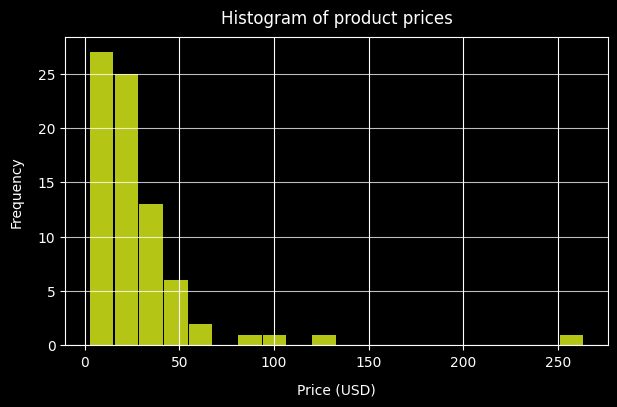

In [216]:
# Plot Histogram
import matplotlib.pyplot as plt
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df_sub['price'], 
                            bins=20, 
                            color="#B4C515",
                            alpha=1.00, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Price (USD)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of product prices', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [217]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.8.0-1030-azure
Datetime: 2025-09-21 14:51:10
Python Version: 3.12.1
-----------------------------------



# 1. What are the details of all customers whose country is 'Spain'?

In [218]:
#Zuerst Custmers Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'customers'
""", con=engine)

df_columns


,column_name,data_type
0,customerid,integer
1,customername,character varying
2,contactname,character varying
3,address,character varying
4,city,character varying
5,postalcode,character varying
6,country,character varying


In [219]:
#Abfragen der Daten aus der Customers Tabelle
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query("""
SELECT
    p.customerid,
    p.customername,
    p.contactname,
    p.address,
    p.city,
    p.postalcode,
    p.country
FROM customers p
WHERE p.country = 'Spain' 
""",con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub


,customerid,customername,contactname,address,city,postalcode,country
0,8,Bólido Comidas preparadas,Martín Sommer,"C/ Araquil, 67",Madrid,28023,Spain
1,22,FISSA Fabrica Inter. Salchichas S.A.,Diego Roel,"C/ Moralzarzal, 86",Madrid,28034,Spain
2,29,Galería del gastrónomo,Eduardo Saavedra,"Rambla de Cataluña, 23",Barcelona,8022,Spain
3,30,Godos Cocina Típica,José Pedro Freyre,"C/ Romero, 33",Sevilla,41101,Spain
4,69,Romero y tomillo,Alejandra Camino,"Gran Vía, 1",Madrid,28001,Spain


# 2. What are the distinct cities of customers from Germany with a city containing the letter 'B'?


In [220]:
#Abfragen der Daten aus der Customers Tabelle
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query("""
SELECT
    p.customerid,
    p.customername,
    p.contactname,
    p.address,
    p.city,
    p.postalcode,
    p.country
FROM customers p
WHERE p.country = 'Germany' 
AND p.city LIKE '%%B%%'
""",con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub


,customerid,customername,contactname,address,city,postalcode,country
0,1,Alfreds Futterkiste,Maria Anders,Obere Str. 57,Berlin,12209,Germany
1,39,Königlich Essen,Philip Cramer,Maubelstr. 90,Brandenburg,14776,Germany


# 3. What are the number of orders placed by each customer? Sort the result by the number of orders in descending order.

In [221]:
import pandas as pd

df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'orderdetails'
""", con=engine)

df_columns


,column_name,data_type
0,orderdetailid,integer
1,orderid,integer
2,productid,integer
3,quantity,integer


In [222]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: Number of orders per customer, sorted descending
df_orders_per_customer = pd.read_sql_query("""
SELECT
    c.customerid,
    c.customername,
    COUNT(o.orderid) AS num_orders
FROM customers c
LEFT JOIN orders o ON c.customerid = o.customerid
GROUP BY c.customerid, c.customername
ORDER BY num_orders DESC
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_orders_per_customer

,customerid,customername,num_orders
0,20,Ernst Handel,10
1,63,QUICK-Stop,7
2,87,Wartian Herkku,7
3,65,Rattlesnake Canyon Grocery,7
4,37,Hungry Owl All-Night Grocers,6
...,...,...,...
86,78,The Cracker Box,0
87,42,Laughing Bacchus Wine Cellars,0
88,22,FISSA Fabrica Inter. Salchichas S.A.,0
89,74,Spécialités du monde,0


# 4. What are the customers who have placed more than 3 orders?

In [223]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: Number of orders per customer, sorted descending
df_orders_per_customer = pd.read_sql_query("""
SELECT
    c.customerid,
    c.customername,
    COUNT(o.orderid) AS num_orders
FROM customers c
LEFT JOIN orders o ON c.customerid = o.customerid
GROUP BY c.customerid, c.customername
HAVING COUNT (orderid) > 3
ORDER BY num_orders DESC
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_orders_per_customer

#durch die Funktion HAVING COUNT filtern wir die Kunden heraus, die mehr als 3 Bestellungen getätigt haben.

,customerid,customername,num_orders
0,20,Ernst Handel,10
1,65,Rattlesnake Canyon Grocery,7
2,63,QUICK-Stop,7
3,87,Wartian Herkku,7
4,37,Hungry Owl All-Night Grocers,6
5,75,Split Rail Beer & Ale,6
6,51,Mère Paillarde,5
7,46,LILA-Supermercado,5
8,41,La maison d''Asie,5
9,55,Old World Delicatessen,4


# 5. What are the top 5 most expensive products? Round the price to 2 decimal places.

In [224]:
#Zuerst products Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'products'
""", con=engine)

df_columns

,column_name,data_type
0,productid,integer
1,supplierid,integer
2,categoryid,integer
3,price,numeric
4,productname,character varying
5,unit,character varying


In [225]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: Top 5 most expensive products, rounded to 2 decimal places
df_top5_expensive = pd.read_sql_query("""
SELECT
    productid,
    productname,
    ROUND(price, 2) AS price
FROM products p
ORDER BY price DESC
LIMIT 5
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_top5_expensive

#durch die Funktion ROUND runden wir die Preise auf 2 Nachkommastellen.
#durch die FUnktion LIMIT 5 begrenzen wir die Ausgabe auf die 5 teuersten Produkte.

,productid,productname,price
0,38,Côte de Blaye,263.50
1,29,Thüringer Rostbratwurst,123.79
2,9,Mishi Kobe Niku,97.00
3,20,Sir Rodney's Marmalade,81.00
4,18,Carnarvon Tigers,62.50


# 6. What are the order details (ProductID, Quantity) for customers from France?

In [226]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: order details from french customers
df_orders_per_customer = pd.read_sql_query("""
SELECT
    c.customername,
    o.orderid,
    od.productid,
    od.quantity
FROM customers c
JOIN orders o ON c.customerid = o.customerid
JOIN orderdetails od ON o.orderid = od.orderid
WHERE c.country = 'France'
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_orders_per_customer

#mit dem Befehl JOIN verknüpfen wir die Tabellen Customers, Orders und OrderDetails basierend auf den entsprechenden Fremdschlüssel-Beziehungen.
#mit dem Befehl WHERE filtern wir die Kunden heraus, die aus Frankreich stammen.
#mit dem Befehl ON geben wir die Bedingungen für die Verknüpfung der Tabellen an, indem wir die entsprechenden Fremdschlüssel-Beziehungen verwenden.

,customername,orderid,productid,quantity
0,Victuailles en stock,10251,22,6
1,Victuailles en stock,10251,57,15
2,Victuailles en stock,10251,65,20
3,Blondel père et fils,10265,17,30
4,Blondel père et fils,10265,70,20
5,Vins et alcools Chevalier,10274,71,20
6,Vins et alcools Chevalier,10274,72,7
7,Vins et alcools Chevalier,10295,56,4
8,Blondel père et fils,10297,39,60
9,Blondel père et fils,10297,72,20


# 7. Area there products without a category assigned?

In [227]:
#Zuerst products Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'products'
""", con=engine)

df_columns

,column_name,data_type
0,productid,integer
1,supplierid,integer
2,categoryid,integer
3,price,numeric
4,productname,character varying
5,unit,character varying


In [228]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: products without a category assigned
df_category = pd.read_sql_query("""
SELECT
    p.productid,
    p.productname,
    p.categoryid
FROM products p
LEFT JOIN categories c ON p.categoryid = c.categoryid
WHERE p.categoryid IS NULL OR c.categoryid IS NULL
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_category


df_no_category = pd.read_sql_query("""
SELECT
    productid,
    productname,
    categoryid
FROM products
WHERE categoryid IS NULL
""", con=engine)
df_no_category

,productid,productname,categoryid


# 8. What are all orders and their employees?

In [229]:
#Zuerst orders Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'orders'
""", con=engine)

df_columns

,column_name,data_type
0,orderid,integer
1,customerid,integer
2,employeeid,integer
3,orderdate,timestamp without time zone
4,shipperid,integer


In [230]:
#Rausfinden welche Spalten es für Employees gibt.

df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'employees'
""", con=engine)
df_columns

,column_name,data_type
0,employeeid,integer
1,birthdate,timestamp without time zone
2,lastname,character varying
3,firstname,character varying
4,photo,character varying
5,notes,character varying


In [231]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: all orders and their employees
df_orders_employees = pd.read_sql_query("""
SELECT
    o.orderid,
    o.employeeid,
    e.firstname || ' ' || e.lastname AS name
FROM orders o
JOIN employees e ON o.employeeid = e.employeeid
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_orders_employees

#durch die Verkettung von Vor- und Nachname in der SQL-Abfrage erstellen wir eine neue Spalte "name", die den vollständigen Namen des Mitarbeiters enthält.
#|| ' ' || ensteht für die Verkettung (Konkatenation) von Zeichenketten in SQL. In diesem Fall wird es verwendet, um den Vornamen (e.firstname) und den Nachnamen (e.lastname) eines Mitarbeiters zu einer einzigen Zeichenkette zu verbinden, wobei ein Leerzeichen (' ') dazwischen eingefügt wird.

,orderid,employeeid,name
0,10248,5,Steven Buchanan
1,10249,6,Michael Suyama
2,10250,4,Margaret Peacock
3,10251,3,Janet Leverling
4,10252,4,Margaret Peacock
...,...,...,...
191,10439,6,Michael Suyama
192,10440,4,Margaret Peacock
193,10441,3,Janet Leverling
194,10442,3,Janet Leverling


# 9. What is the average, minimum, and maximum price of products? Round the values to 2 decimal places.

In [232]:
#Zuerst products Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'products'
""", con=engine)

df_columns

,column_name,data_type
0,productid,integer
1,supplierid,integer
2,categoryid,integer
3,price,numeric
4,productname,character varying
5,unit,character varying


In [233]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: avg. price, min. price, max. price of products rounded to 2 decimal places
df_prices = pd.read_sql_query("""
SELECT
    p.productid,
    ROUND(AVG(p.price), 2) AS avg_price,
    ROUND(MIN(p.price), 2) AS min_price,
    ROUND(MAX(p.price), 2) AS max_price
FROM products p
GROUP BY p.productid
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_prices

#durch ROUND runden wir die Preise auf 2 Nachkommastellen.
#durch GROUP BY gruppieren wir die Ergebnisse nach der Produkt-ID, um aggregierte Werte für jedes Produkt zu erhalten.
#durch AVG, MIN und MAX berechnen wir den Durchschnittspreis, den Mindestpreis und den Höchstpreis für jedes Produkt.

,productid,avg_price,min_price,max_price
0,51,53.00,53.00,53.00
1,70,15.00,15.00,15.00
2,22,21.00,21.00,21.00
3,73,15.00,15.00,15.00
4,42,14.00,14.00,14.00
...,...,...,...,...
72,49,20.00,20.00,20.00
73,33,2.50,2.50,2.50
74,64,33.25,33.25,33.25
75,55,24.00,24.00,24.00


# 10. What are the products with prices between 10 and 50? Round the price to 2 decimal places and sort the result by price in descending order.

In [234]:
#Zuerst products Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'products'
""", con=engine)

df_columns

,column_name,data_type
0,productid,integer
1,supplierid,integer
2,categoryid,integer
3,price,numeric
4,productname,character varying
5,unit,character varying


In [235]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: avg. price, min. price, max. price of products rounded to 2 decimal places
df_pricerange = pd.read_sql_query("""
SELECT
    p.productid,
    ROUND(p.price, 2) AS price
FROM products p
WHERE p.price BETWEEN 10 AND 50
ORDER BY price DESC
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_pricerange

#mit der WHERE-Klausel filtern wir die Produkte heraus, deren Preis zwischen 10 und 50 liegt.
#mit ORDER BY sortieren wir die Ergebnisse nach dem Preis in absteigender Reihenfolge

,productid,price
0,62,49.30
1,43,46.00
2,28,45.60
3,27,43.90
4,63,43.90
5,8,40.00
6,17,39.00
7,56,38.00
8,12,38.00
9,69,36.00


# 11. What are the shippers and the total number of orders shipped by each shipper, including those with no orders?

In [236]:
#Neue Varaible "shippers" soll überprüft werden, ob diese in der DB existiert. --> daher erneute Abfrage der Spalten

# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Open a connection
with engine.connect() as connection:

    # Execute the query
    result = connection.execute(text("""SELECT table_name
                                        FROM information_schema.tables
                                        WHERE table_schema = 'public'"""))
    
    # Fetch and print the results
    for row in result:
        print(row[0])

# Dispose the engine
engine.dispose()

categories
products
suppliers
employees
orders
customers
shippers
orderdetails


In [237]:
#Zuerst orders Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'orders'
""", con=engine)

df_columns

,column_name,data_type
0,orderid,integer
1,customerid,integer
2,employeeid,integer
3,orderdate,timestamp without time zone
4,shipperid,integer


In [238]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: shippers and total number of orders per shipper including shippers with zero orders
df_order_shipper = pd.read_sql_query("""
SELECT
    s.shipperid,
    s.shippername,
    COUNT(o.orderid) AS total_orders
FROM shippers s
LEFT JOIN orders o ON s.shipperid = o.shipperid
GROUP BY s.shipperid, s.shippername
ORDER BY total_orders DESC
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_order_shipper

# If you have already grouped by s.shipperid, s.shippername and still see no shippers with zero orders, it means that every shipper in your shippers table has at least one order in the orders table. The query is correct and will show shippers with zero orders if they exist. If none appear, your data does not contain any shippers without orders. No further action is needed unless you expect there to be such shippers in your data.
#

,shipperid,shippername,total_orders
0,2,United Package,74
1,3,Federal Shipping,68
2,1,Speedy Express,54


# 12. What are the employees who have processed > 5 orders? Sort the result by the number of orders in descending order.

In [239]:
#Überblick der verfügbaren Spalten.

# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Open a connection
with engine.connect() as connection:

    # Execute the query
    result = connection.execute(text("""SELECT table_name
                                        FROM information_schema.tables
                                        WHERE table_schema = 'public'"""))
    
    # Fetch and print the results
    for row in result:
        print(row[0])

# Dispose the engine
engine.dispose()

categories
products
suppliers
employees
orders
customers
shippers
orderdetails


In [240]:
#Zuerst orders Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'orders'
""", con=engine)

df_columns

,column_name,data_type
0,orderid,integer
1,customerid,integer
2,employeeid,integer
3,orderdate,timestamp without time zone
4,shipperid,integer


In [241]:
#Zuerst orderdetails Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'orderdetails'
""", con=engine)

df_columns

,column_name,data_type
0,orderdetailid,integer
1,orderid,integer
2,productid,integer
3,quantity,integer


In [242]:
#Zuerst employees Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'employees'
""", con=engine)

df_columns

,column_name,data_type
0,employeeid,integer
1,birthdate,timestamp without time zone
2,lastname,character varying
3,firstname,character varying
4,photo,character varying
5,notes,character varying


In [243]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: employess who have more than 5 processed orders
df_processed_orders = pd.read_sql_query("""
SELECT
    e.employeeid,
    e.firstname || ' ' || e.lastname AS name,
    COUNT(o.orderid) AS num_orders
FROM employees e
JOIN orders o ON e.employeeid = o.employeeid
GROUP BY e.employeeid, e.firstname, e.lastname
HAVING COUNT(o.orderid) > 5
ORDER BY num_orders DESC
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_processed_orders

#mit HAVING COUNT filtern wir die Mitarbeiter heraus, die mehr als 5 Bestellungen bearbeitet haben.
#mit COUNT(o.orderid) AS num_orders zählen wir die Anzahl der Bestellungen, die jeder Mitarbeiter bearbeitet hat, und benennen diese Spalte als "num_orders".
#mit JOIN verknüpfen wir die Tabellen Employees und Orders basierend auf der Mitarbeiter-ID.
#mit GROUP BY gruppieren wir die Ergebnisse nach der Mitarbeiter-ID, dem Vornamen und

,employeeid,name,num_orders
0,4,Margaret Peacock,40
1,3,Janet Leverling,31
2,1,Nancy Davolio,29
3,8,Laura Callahan,27
4,2,Andrew Fuller,20
5,6,Michael Suyama,18
6,7,Robert King,14
7,5,Steven Buchanan,11
8,9,Anne Dodsworth,6


# 13. What is the total revenue for each product within each order, including the product name and ordered by order ID and total revenue in descending order?

In [244]:
#Überblick der verfügbaren Spalten.

# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Open a connection
with engine.connect() as connection:

    # Execute the query
    result = connection.execute(text("""SELECT table_name
                                        FROM information_schema.tables
                                        WHERE table_schema = 'public'"""))
    
    # Fetch and print the results
    for row in result:
        print(row[0])

# Dispose the engine
engine.dispose()

categories
products
suppliers
employees
orders
customers
shippers
orderdetails


In [245]:
#Zuerst products Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'products'
""", con=engine)

df_columns

,column_name,data_type
0,productid,integer
1,supplierid,integer
2,categoryid,integer
3,price,numeric
4,productname,character varying
5,unit,character varying


In [246]:
#Zuerst orderdetails Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'orderdetails'
""", con=engine)

df_columns

,column_name,data_type
0,orderdetailid,integer
1,orderid,integer
2,productid,integer
3,quantity,integer


In [247]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: total revenue for each product within each order, including product name, ordered by order ID and total revenue descending
df_order_product_revenue = pd.read_sql_query("""
SELECT
    od.orderid,
    od.productid,
    p.productname,
    od.quantity * p.price AS total_revenue
FROM orderdetails od
JOIN products p ON od.productid = p.productid
ORDER BY od.orderid, total_revenue DESC
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_order_product_revenue

#mit der Sequenz od.quantity * p.price AS total_revenue kalkulieren wir den Gesamtumsatz.
#mit dem ORDER BY filtern wir nach Umsatz je nach Order ID.


,orderid,productid,productname,total_revenue
0,10248,11,Queso Cabrales,252.00
1,10248,72,Mozzarella di Giovanni,174.00
2,10248,42,Singaporean Hokkien Fried Mee,140.00
3,10249,51,Manjimup Dried Apples,2120.00
4,10249,14,Tofu,209.25
...,...,...,...,...
513,10442,66,Louisiana Hot Spiced Okra,1020.00
514,10442,11,Queso Cabrales,630.00
515,10442,54,Tourtière,596.00
516,10443,28,Rössle Sauerkraut,547.20


# 14. What are the customers, employees, and the total number of orders placed by each customer?

In [248]:
#Überblick der verfügbaren Spalten.

# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Open a connection
with engine.connect() as connection:

    # Execute the query
    result = connection.execute(text("""SELECT table_name
                                        FROM information_schema.tables
                                        WHERE table_schema = 'public'"""))
    
    # Fetch and print the results
    for row in result:
        print(row[0])

# Dispose the engine
engine.dispose()

categories
products
suppliers
employees
orders
customers
shippers
orderdetails


In [249]:
#Zuerst customers Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'customers'
""", con=engine)

df_columns

,column_name,data_type
0,customerid,integer
1,customername,character varying
2,contactname,character varying
3,address,character varying
4,city,character varying
5,postalcode,character varying
6,country,character varying


In [250]:
#Zuerst employees Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'employees'
""", con=engine)

df_columns

,column_name,data_type
0,employeeid,integer
1,birthdate,timestamp without time zone
2,lastname,character varying
3,firstname,character varying
4,photo,character varying
5,notes,character varying


In [251]:
#Zuerst orders Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'orders'
""", con=engine)

df_columns

,column_name,data_type
0,orderid,integer
1,customerid,integer
2,employeeid,integer
3,orderdate,timestamp without time zone
4,shipperid,integer


In [252]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: customers, employees and total of orders placed by each customer.
df_order_product_revenue = pd.read_sql_query("""
SELECT
    c.customerid,
    c.customername,                   
    e.employeeid,
    e.firstname || ' ' || e.lastname AS name,
    COUNT(o.orderid) AS num_orders
FROM customers c 
JOIN orders o ON c.customerid = o.customerid
JOIN employees e ON o.employeeid = e.employeeid
GROUP BY c.customerid, c.customername, e.employeeid, e.firstname, e.lastname
ORDER BY num_orders DESC
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_order_product_revenue

,customerid,customername,employeeid,name,num_orders
0,20,Ernst Handel,4,Margaret Peacock,3
1,65,Rattlesnake Canyon Grocery,1,Nancy Davolio,3
2,87,Wartian Herkku,8,Laura Callahan,3
3,25,Frankenversand,4,Margaret Peacock,3
4,46,LILA-Supermercado,3,Janet Leverling,3
...,...,...,...,...,...
165,15,Comércio Mineiro,8,Laura Callahan,1
166,51,Mère Paillarde,2,Andrew Fuller,1
167,37,Hungry Owl All-Night Grocers,8,Laura Callahan,1
168,4,Around the Horn,8,Laura Callahan,1


# 15. What are the products with an average price higher than the overall average product price?  Round the price to 2 decimal places and sort the result by price in descending order.

In [253]:
#Zuerst products Tabelle abfragen / checken.
df_columns = pd.read_sql_query("""
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = 'products'
""", con=engine)

df_columns

,column_name,data_type
0,productid,integer
1,supplierid,integer
2,categoryid,integer
3,price,numeric
4,productname,character varying
5,unit,character varying


In [254]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Query: products with price higher than overall average price, rounded to 2 decimal places and sorted by price descending
df_product_high_avg = pd.read_sql_query("""
SELECT
    productid,
    productname,
    ROUND(price, 2) AS price,
    ROUND((SELECT AVG(price) FROM products), 2) AS avg_price
FROM products
WHERE price > (SELECT AVG(price) FROM products)
ORDER BY price DESC
""", con=engine)

# Dispose the engine
engine.dispose()

# Show the result
df_product_high_avg

,productid,productname,price,avg_price
0,38,Côte de Blaye,263.50,28.87
1,29,Thüringer Rostbratwurst,123.79,28.87
2,9,Mishi Kobe Niku,97.00,28.87
3,20,Sir Rodney's Marmalade,81.00,28.87
4,18,Carnarvon Tigers,62.50,28.87
5,59,Raclette Courdavault,55.00,28.87
6,51,Manjimup Dried Apples,53.00,28.87
7,62,Tarte au sucre,49.30,28.87
8,43,Ipoh Coffee,46.00,28.87
9,28,Rössle Sauerkraut,45.60,28.87


Fragen aus dem Unterricht beantwortet. (Folie)